# Introduction to CNN and computer vision with tensor flow

# Get the data


In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()



--2024-05-21 20:26:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 173.194.203.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  80.6MB/s    in 1.3s    

2024-05-21 20:26:43 (80.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
import os
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

There are 2 directories and 0 images in 'pizza_steak'. 
There are 2 directories and 0 images in 'pizza_steak/train'. 
There are 0 directories and 750 images in 'pizza_steak/train/pizza'. 
There are 0 directories and 750 images in 'pizza_steak/train/steak'. 
There are 2 directories and 0 images in 'pizza_steak/test'. 
There are 0 directories and 250 images in 'pizza_steak/test/pizza'. 
There are 0 directories and 250 images in 'pizza_steak/test/steak'. 


In [3]:
# Another way to find out how many images are in files
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_test = len(os.listdir("pizza_steak/test/steak"))
num_steak_images_test, num_steak_images_train

(250, 750)

In [4]:
num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza"))
num_pizza_images_test = len(os.listdir("pizza_steak/test/pizza"))
num_pizza_images_train, num_pizza_images_test

(750, 250)

In [5]:
# Get the classnames programstically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [6]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and Plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


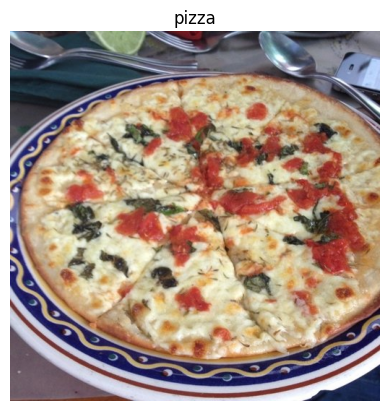

In [7]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [8]:
img.shape


(512, 512, 3)

In [9]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.61176471, 0.76470588, 0.88627451],
        [0.59607843, 0.74901961, 0.87058824],
        [0.55686275, 0.71764706, 0.83529412],
        ...,
        [0.55686275, 0.55686275, 0.59607843],
        [0.54901961, 0.54901961, 0.58823529],
        [0.5372549 , 0.5372549 , 0.57647059]],

       [[0.72156863, 0.86666667, 0.98039216],
        [0.70196078, 0.85490196, 0.96862745],
        [0.67843137, 0.83137255, 0.94509804],
        ...,
        [0.56470588, 0.56470588, 0.60392157],
        [0.56078431, 0.56078431, 0.6       ],
        [0.55686275, 0.55686275, 0.59607843]],

       [[0.75294118, 0.89411765, 0.99607843],
        [0.74901961, 0.89019608, 0.99215686],
        [0.74509804, 0.88627451, 0.98823529],
        ...,
        [0.56470588, 0.56470588, 0.60392157],
        [0.56862745, 0.56862745, 0.60784314],
        [0.56862745, 0.56862745, 0.60784314]],

       ...,

       [[0.5254902 , 0.41176471, 0.41960784],
        [0.5254902 , 0.41176471, 0.41960784],
        [0.52156863, 0

## An end to end Example

Let's build a convolutional neural network to find patterns in our images, more specifically we need  a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called normalization or scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our data directories(setup dirctory once in a variable so that it can be called when ever needed)
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir, batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)
# Build a CNN model (same as the Tiny Vgg on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                               padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 170ms/step - loss: 0.5671 - accuracy: 0.7187 - val_loss: 0.4382 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 5s 117ms/step - loss: 0.4219 - accuracy: 0.8120 - val_loss: 0.3491 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 8s 163ms/step - loss: 0.4213 - accuracy: 0.8060 - val_loss: 0.3690 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 6s 128ms/step - loss: 0.3752 - accuracy: 0.8393 - val_loss: 0.3590 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.3394 - accuracy: 0.8600 - val_loss: 0.3207 - val_accuracy: 0.8700


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 163ms/step - loss: 1.0425 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 146ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 109ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 144ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 122ms/step - loss: 2.8115 - accuracy: 0.6233 - val_loss: 0.4849 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.6464 - accuracy: 0.7160 - val_loss: 0.5045 - val_accuracy: 0.7540
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.7607 - accuracy: 0.6987 - val_loss: 0.8712 - val_accuracy: 0.5760
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.6009 - accuracy: 0.7313 - val_loss: 0.5018 - val_accuracy: 0.7380
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.5355 - accuracy: 0.7560 - val_loss: 0.5079 - val_accuracy: 0.7800


## 1. Becoming one with data


In [10]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-05-21 20:27:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 173.194.203.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   125MB/s    in 0.8s    

2024-05-21 20:27:04 (125 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



Image shape: (512, 512, 3)
Image shape: (512, 384, 3)


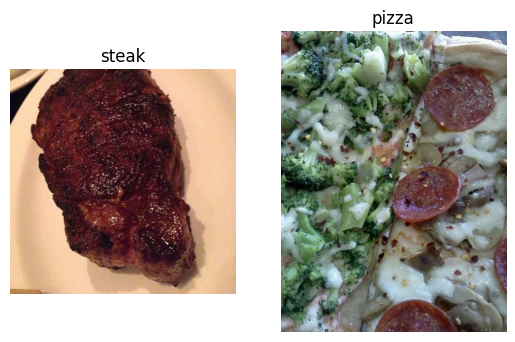

In [11]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


### 2. Preprocess the data (prepare it for a model)

In [12]:
# Definre directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

### Turning our data into batches (for better fitting while training)

In [13]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [14]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [16]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.9450981 , 0.8117648 , 0.45882356],
          [0.9490197 , 0.81568635, 0.46274513],
          [0.93725497, 0.80392164, 0.454902  ],
          ...,
          [0.9725491 , 0.882353  , 0.61960787],
          [0.95294124, 0.854902  , 0.59607846],
          [0.9568628 , 0.8588236 , 0.6       ]],
 
         [[0.9333334 , 0.8000001 , 0.44705886],
          [0.9333334 , 0.8000001 , 0.45098042],
          [0.9294118 , 0.7960785 , 0.44705886],
          ...,
          [0.9686275 , 0.87843144, 0.6117647 ],
          [0.94117653, 0.8431373 , 0.5803922 ],
          [0.9607844 , 0.854902  , 0.5921569 ]],
 
         [[0.94117653, 0.8078432 , 0.45882356],
          [0.9490197 , 0.81568635, 0.4666667 ],
          [0.9333334 , 0.8000001 , 0.45098042],
          ...,
          [0.98823535, 0.8980393 , 0.62352943],
          [0.9725491 , 0.87843144, 0.6039216 ],
          [0.9450981 , 0.83921576, 0.5686275 ]],
 
         ...,
 
         [[0.6901961 , 0.38431376, 0.        ],
          [0.72549

In [17]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [18]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [19]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


In [20]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 151ms/step - loss: 0.6238 - accuracy: 0.6753 - val_loss: 0.4537 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 7s 140ms/step - loss: 0.4380 - accuracy: 0.8040 - val_loss: 0.4031 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3731 - accuracy: 0.8467 - val_loss: 0.3827 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.2476 - accuracy: 0.9080 - val_loss: 0.5871 - val_accuracy: 0.7380
Epoch 5/5
47/47 [==============================] - 5s 110ms/step - loss: 0.1203 - accuracy: 0.9653 - val_loss: 0.4638 - val_accuracy: 0.8120


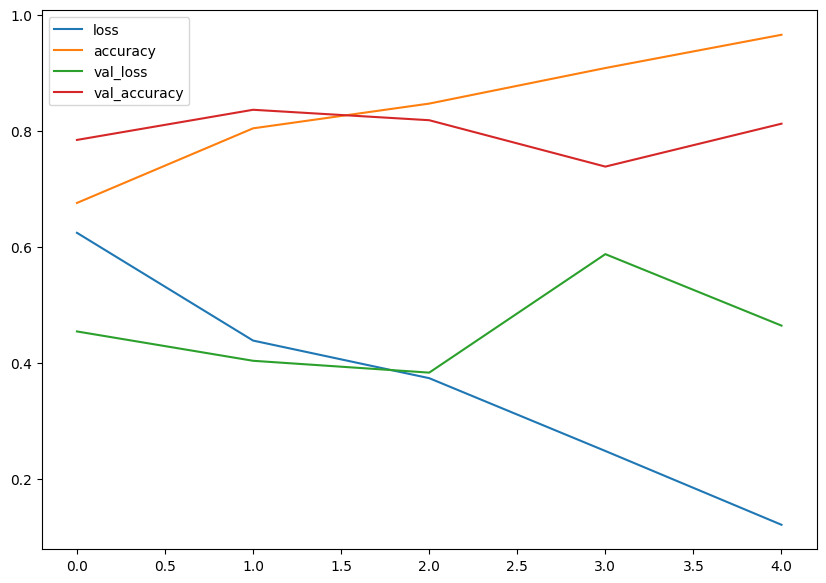

In [21]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [22]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

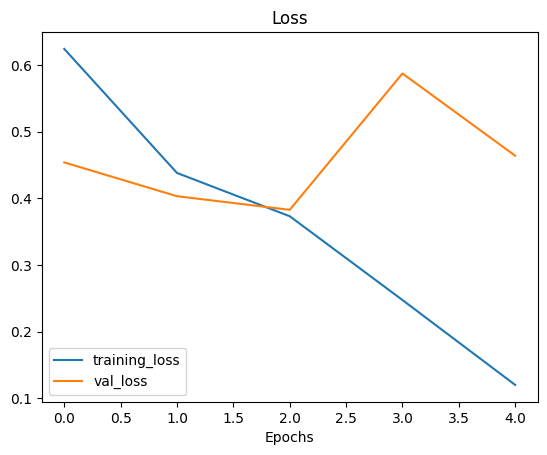

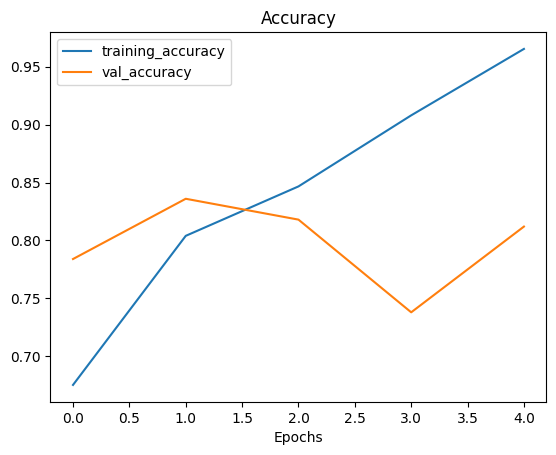

In [23]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [24]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [25]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [26]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 125ms/step - loss: 0.5830 - accuracy: 0.6767 - val_loss: 0.4419 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.4588 - accuracy: 0.8007 - val_loss: 0.4781 - val_accuracy: 0.7420
Epoch 3/5
47/47 [==============================] - 6s 126ms/step - loss: 0.4288 - accuracy: 0.8167 - val_loss: 0.3608 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 5s 111ms/step - loss: 0.3942 - accuracy: 0.8293 - val_loss: 0.4262 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 6s 130ms/step - loss: 0.3638 - accuracy: 0.8433 - val_loss: 0.3352 - val_accuracy: 0.8520


In [27]:
# Check out the model architecture
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 10)       

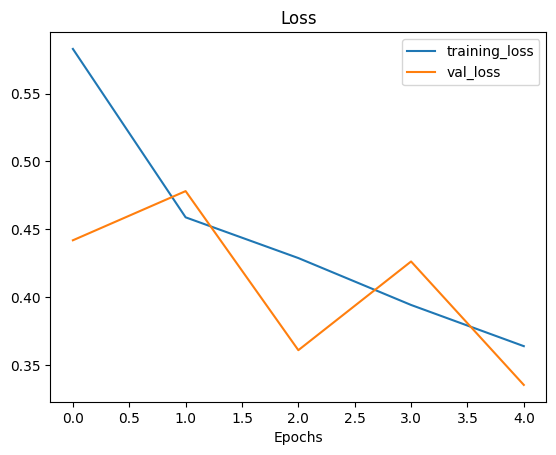

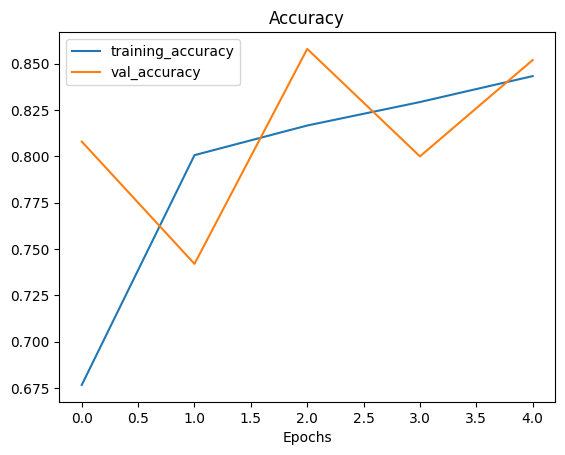

In [28]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

In [29]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [30]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [31]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

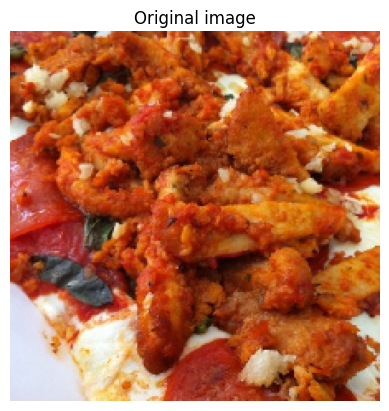

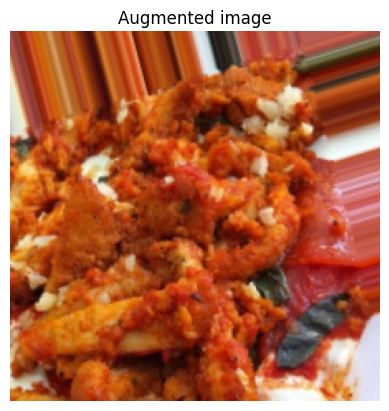

In [32]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [33]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 448ms/step - loss: 0.8097 - accuracy: 0.5080 - val_loss: 0.6942 - val_accuracy: 0.4480
Epoch 2/5
47/47 [==============================] - 26s 554ms/step - loss: 0.6932 - accuracy: 0.4753 - val_loss: 0.6925 - val_accuracy: 0.5200
Epoch 3/5
47/47 [==============================] - 21s 447ms/step - loss: 0.6918 - accuracy: 0.5247 - val_loss: 0.6889 - val_accuracy: 0.5120
Epoch 4/5
47/47 [==============================] - 20s 437ms/step - loss: 0.6938 - accuracy: 0.5260 - val_loss: 0.6817 - val_accuracy: 0.5040
Epoch 5/5
47/47 [==============================] - 21s 443ms/step - loss: 0.6962 - accuracy: 0.4320 - val_loss: 0.6925 - val_accuracy: 0.5580


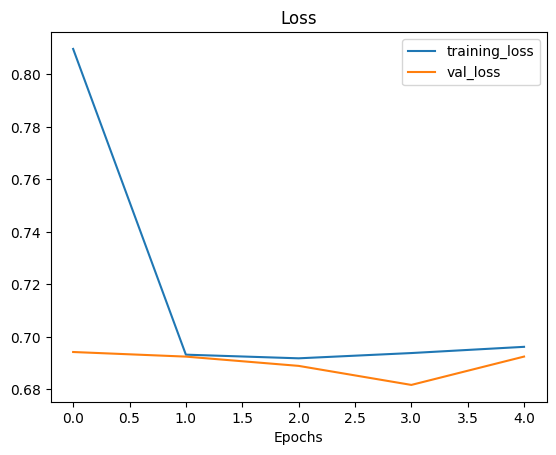

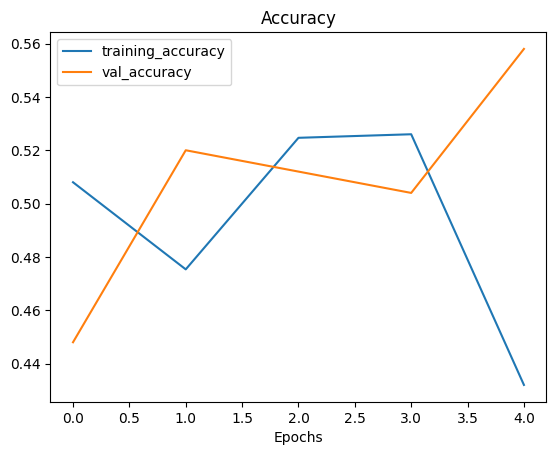

In [34]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [35]:
# shuffling the augumented training data (shuffle = true "earlier in model 6 it was false")
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [36]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 439ms/step - loss: 0.6746 - accuracy: 0.5787 - val_loss: 0.5614 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 21s 457ms/step - loss: 0.5455 - accuracy: 0.7213 - val_loss: 0.3678 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 20s 425ms/step - loss: 0.5189 - accuracy: 0.7427 - val_loss: 0.3983 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 21s 447ms/step - loss: 0.4757 - accuracy: 0.7900 - val_loss: 0.3452 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 21s 443ms/step - loss: 0.4813 - accuracy: 0.7780 - val_loss: 0.3970 - val_accuracy: 0.8320


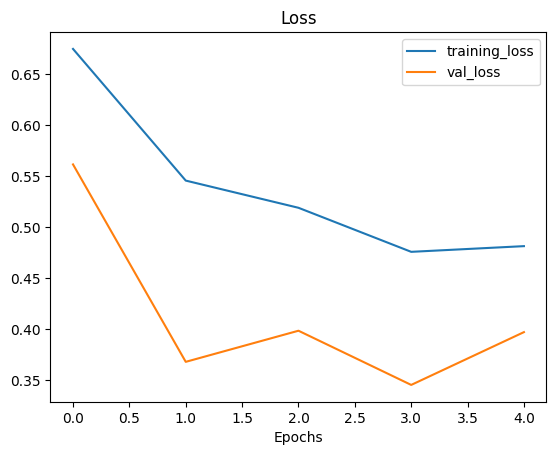

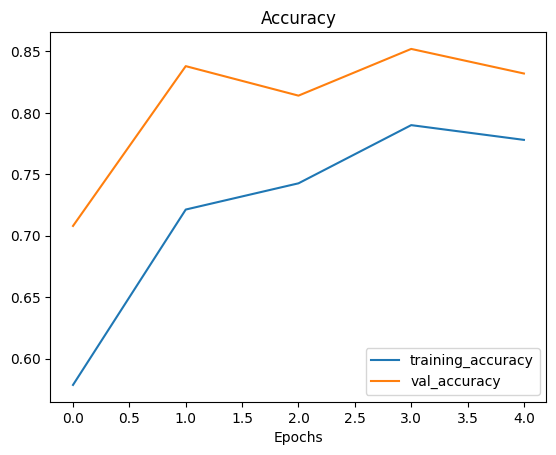

In [37]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

In [39]:
import tensorflow as tf
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 436ms/step - loss: 0.6526 - accuracy: 0.6153 - val_loss: 0.5423 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 23s 480ms/step - loss: 0.5231 - accuracy: 0.7460 - val_loss: 0.4068 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 22s 464ms/step - loss: 0.4801 - accuracy: 0.7900 - val_loss: 0.3619 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 21s 454ms/step - loss: 0.4812 - accuracy: 0.7760 - val_loss: 0.3593 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 21s 457ms/step - loss: 0.4363 - accuracy: 0.8040 - val_loss: 0.3098 - val_accuracy: 0.8840


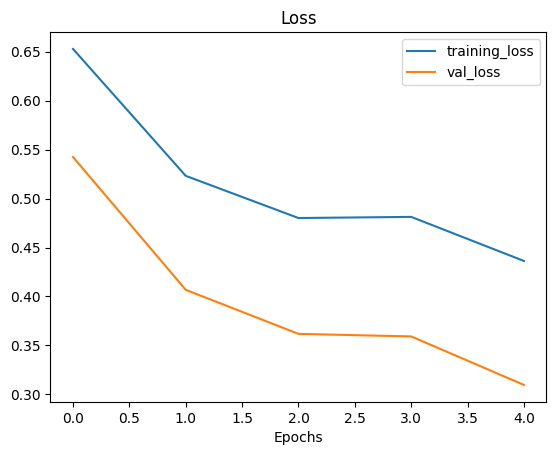

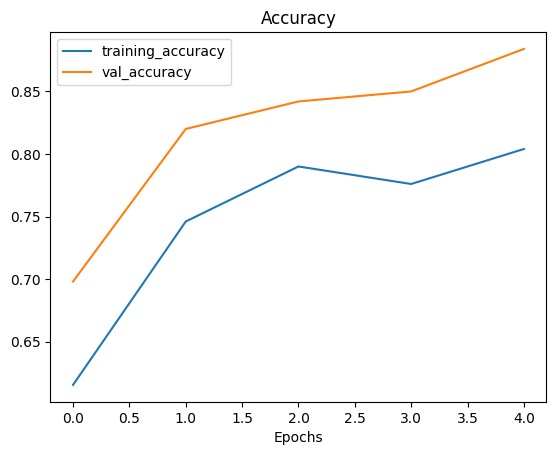

In [40]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

In [42]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2024-05-21 20:54:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2024-05-21 20:54:39 (39.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



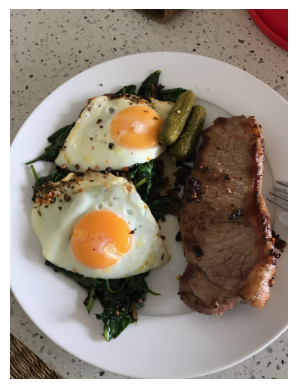

In [43]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [44]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [45]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [46]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [47]:
# Make a prediction on our custom image (spoiler: this won't work)
model_8.predict(steak)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


In [48]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [49]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 314ms/step


array([[0.89689827]], dtype=float32)

In [50]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [51]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [54]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 17ms/step


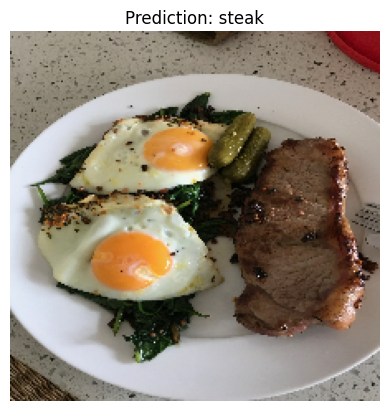

In [55]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2024-05-21 20:59:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2024-05-21 20:59:23 (51.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 25ms/step


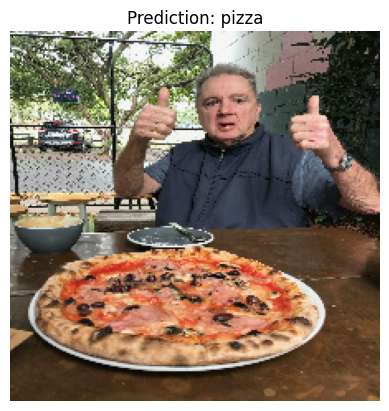

In [56]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

--2024-05-21 20:59:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2024-05-21 20:59:43 (53.4 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

1/1 [==============================] - 0s 33ms/step


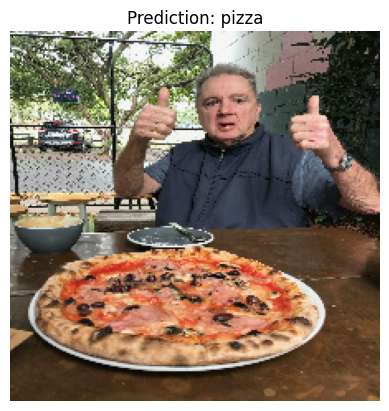

In [57]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

In [59]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-05-21 21:00:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 142.250.107.207, 173.194.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  71.3MB/s    in 9.8s    

2024-05-21 21:00:23 (50.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [60]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [61]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [62]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 382, 3)


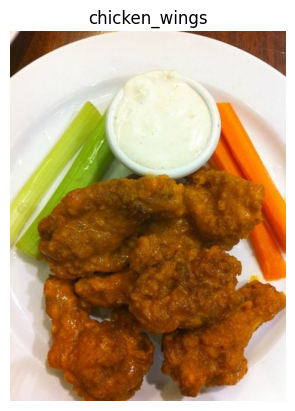

In [63]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [66]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 33s 130ms/step - loss: 2.2240 - accuracy: 0.1867 - val_loss: 2.0349 - val_accuracy: 0.2728
Epoch 2/5
235/235 [==============================] - 30s 128ms/step - loss: 1.9329 - accuracy: 0.3289 - val_loss: 1.9001 - val_accuracy: 0.3320
Epoch 3/5
235/235 [==============================] - 35s 148ms/step - loss: 1.6674 - accuracy: 0.4332 - val_loss: 2.0069 - val_accuracy: 0.2968
Epoch 4/5
235/235 [==============================] - 30s 128ms/step - loss: 1.2030 - accuracy: 0.6027 - val_loss: 2.2087 - val_accuracy: 0.3284
Epoch 5/5
235/235 [==============================] - 28s 119ms/step - loss: 0.5844 - accuracy: 0.8129 - val_loss: 2.9444 - val_accuracy: 0.2748


In [67]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 7s 83ms/step - loss: 2.9444 - accuracy: 0.2748


[2.9443957805633545, 0.27480000257492065]

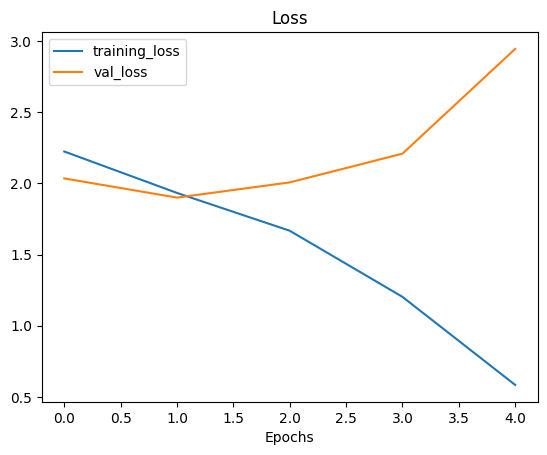

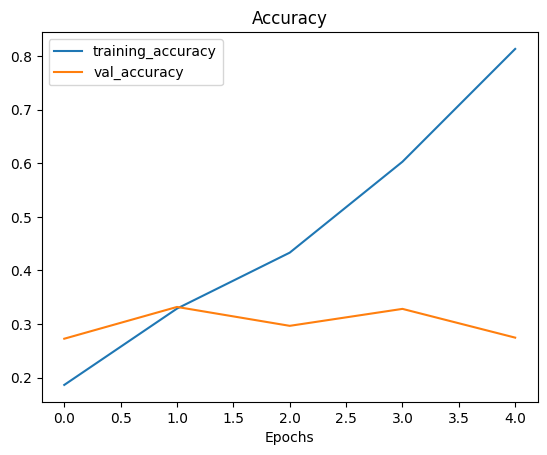

In [68]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

In [69]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 29s 116ms/step - loss: 2.2931 - accuracy: 0.1740 - val_loss: 2.1166 - val_accuracy: 0.2368
Epoch 2/5
235/235 [==============================] - 32s 134ms/step - loss: 1.9539 - accuracy: 0.3176 - val_loss: 2.0647 - val_accuracy: 0.2632
Epoch 3/5
235/235 [==============================] - 36s 153ms/step - loss: 1.7094 - accuracy: 0.4220 - val_loss: 2.1566 - val_accuracy: 0.2288
Epoch 4/5
235/235 [==============================] - 27s 115ms/step - loss: 1.3642 - accuracy: 0.5536 - val_loss: 2.1897 - val_accuracy: 0.2584
Epoch 5/5
235/235 [==============================] - 30s 129ms/step - loss: 0.9283 - accuracy: 0.7001 - val_loss: 2.6239 - val_accuracy: 0.2440


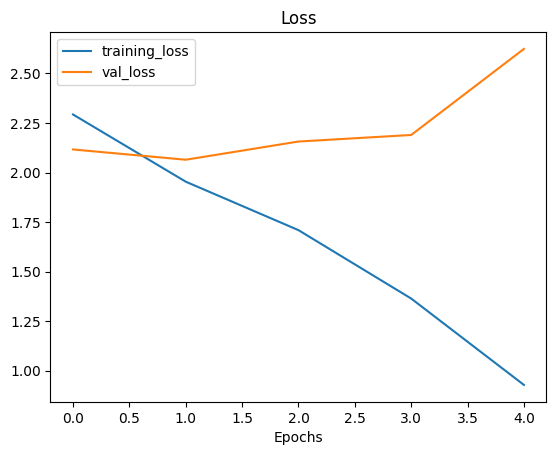

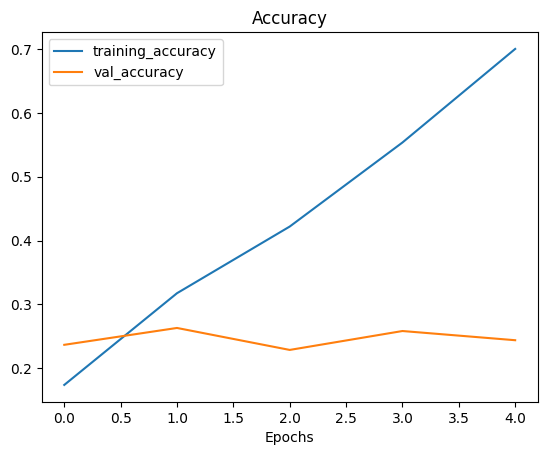

In [70]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

In [71]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [72]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 115s 485ms/step - loss: 2.1647 - accuracy: 0.2115 - val_loss: 2.0194 - val_accuracy: 0.2608
Epoch 2/5
235/235 [==============================] - 103s 440ms/step - loss: 2.0288 - accuracy: 0.2880 - val_loss: 1.8899 - val_accuracy: 0.3300
Epoch 3/5
235/235 [==============================] - 103s 436ms/step - loss: 1.9726 - accuracy: 0.3133 - val_loss: 2.0240 - val_accuracy: 0.3200
Epoch 4/5
235/235 [==============================] - 101s 431ms/step - loss: 1.9351 - accuracy: 0.3313 - val_loss: 2.0065 - val_accuracy: 0.3356
Epoch 5/5
235/235 [==============================] - 103s 437ms/step - loss: 1.9181 - accuracy: 0.3365 - val_loss: 1.8646 - val_accuracy: 0.3668


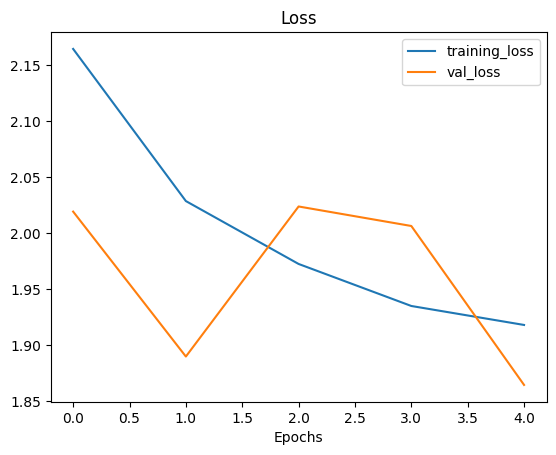

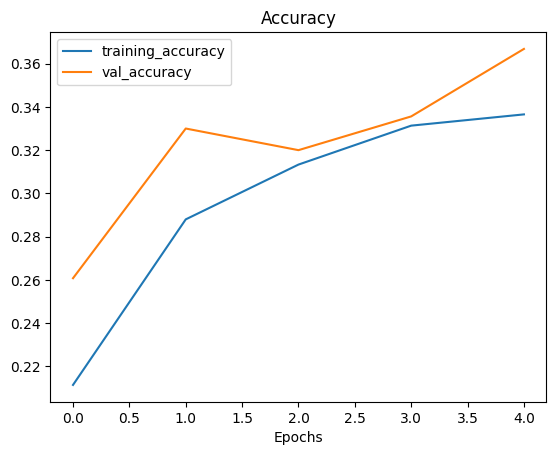

In [73]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

In [74]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [75]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 96ms/step


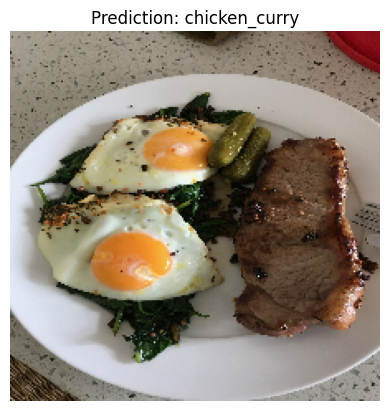

In [76]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 27ms/step


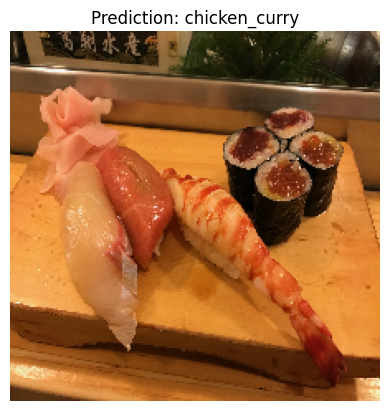

In [77]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 17ms/step


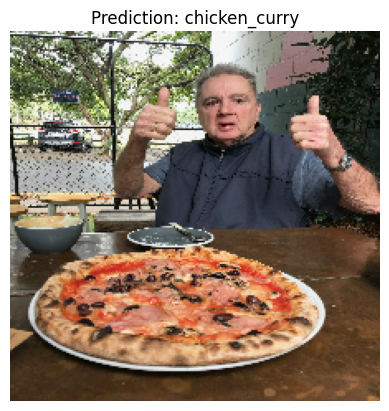

In [78]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 24ms/step


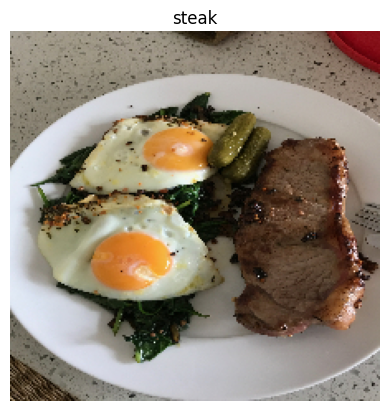

In [79]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [80]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

1/1 [==============================] - 0s 18ms/step


array([[0.02913433, 0.03457952, 0.01637241, 0.24372247, 0.04366956,
        0.01059676, 0.01475981, 0.11734772, 0.45386133, 0.03595605]],
      dtype=float32)

In [81]:
# Find the predicted class name
class_names[pred.argmax()]

'steak'

In [82]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 24ms/step


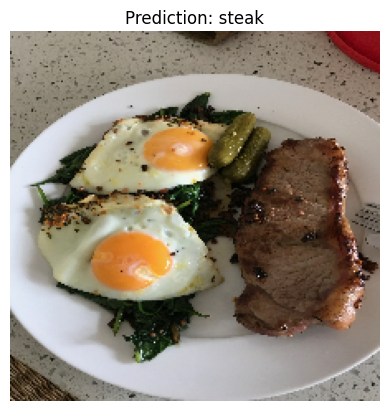

In [83]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 20ms/step


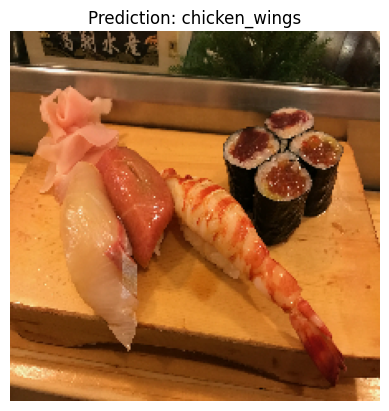

In [84]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 19ms/step


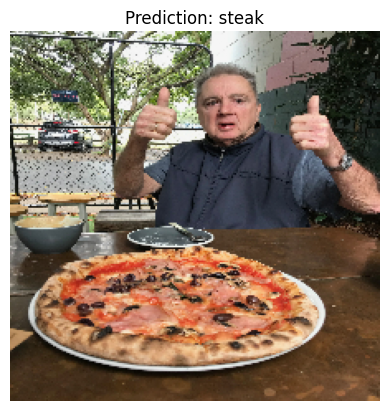

In [85]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 17ms/step


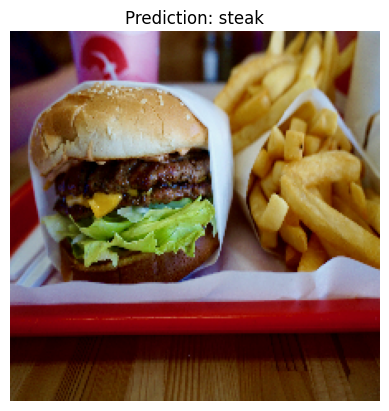

In [86]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

In [87]:
# Save a model
model_11.save("saved_trained_model")

In [88]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 6s 78ms/step - loss: 1.8646 - accuracy: 0.3668


[1.864561915397644, 0.3668000102043152]

In [89]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 8s 98ms/step - loss: 1.8646 - accuracy: 0.3668


[1.864561915397644, 0.3668000102043152]